In [1]:
import pandas as pd

eos = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_eos')
sentinel = pd.read_excel('/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx', sheet_name='all_stacked_sentinel')

len(eos), len(sentinel)

(747, 796)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = eos[['HH', 'HV']]
y = eos['SM']

# Split the data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def train_model(model, optimizer='adam'):

    # Create and compile the model
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )

    # Display model architecture
    # model.summary()

    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )

    # Evaluate on test set
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nTest Loss (MSE): {test_loss:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Calculate additional metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nAdditional Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {np.sqrt(mse):.4f}")
    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot predictions vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()


    plt.figure(figsize=(14, 7))

    # Create index for x-axis
    indices = range(len(y_test))

    # Plot both lines
    plt.scatter(indices, y_test.values,label='actual')
    plt.scatter(indices, y_pred, label='predicted')

    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.title('Actual vs Predicted Values - Line Plot Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples


/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 191.5841
Test MAE: 10.8606
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Additional Metrics:
MSE: 191.5841
R² Score: -0.5743
MAE: 13.8414


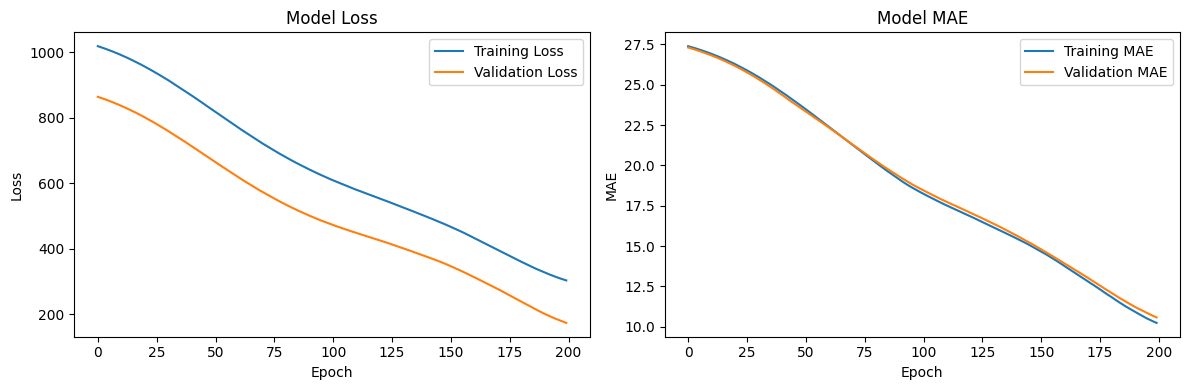

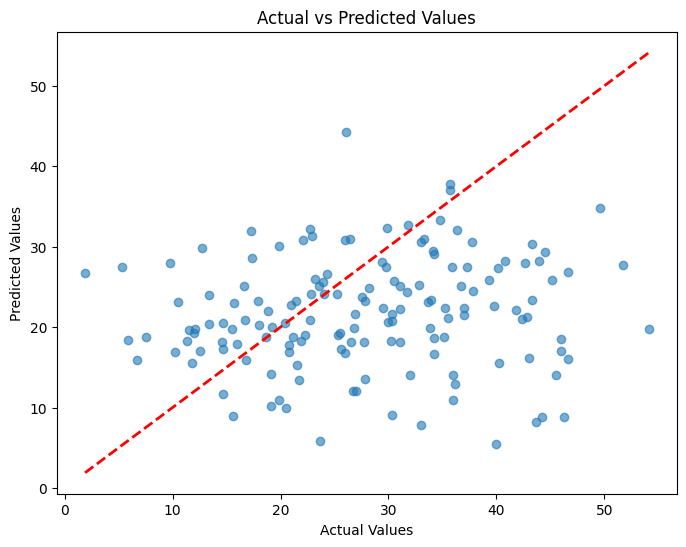

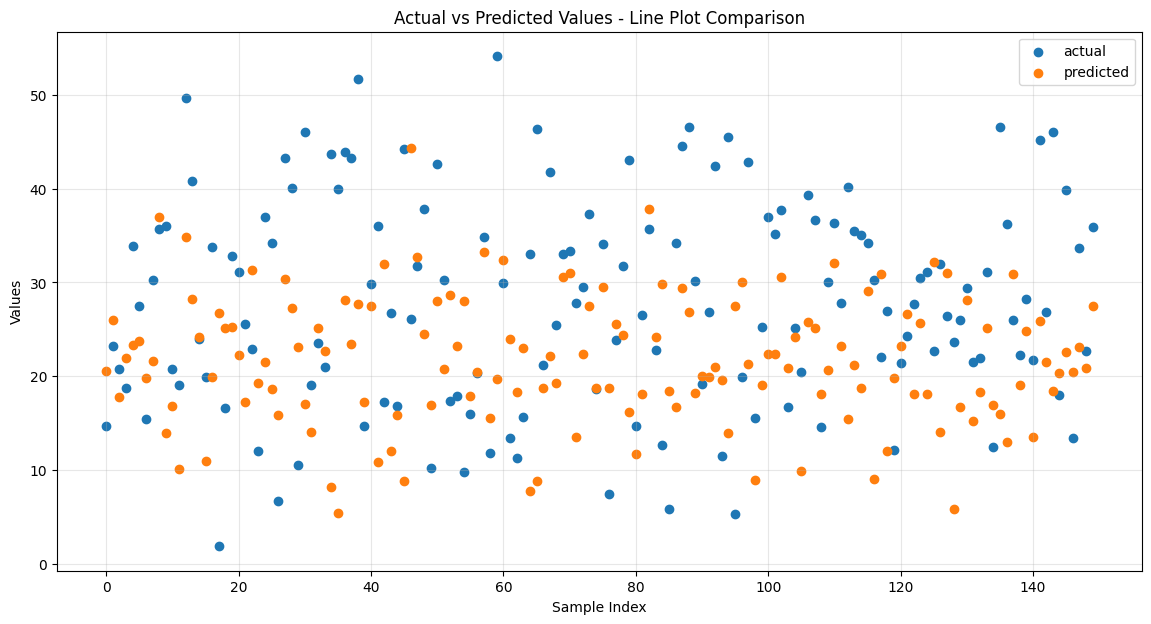

In [ ]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(2, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model)

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 144.4205
Test MAE: 9.6900
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Additional Metrics:
MSE: 144.4205
R² Score: -0.1868
MAE: 12.0175


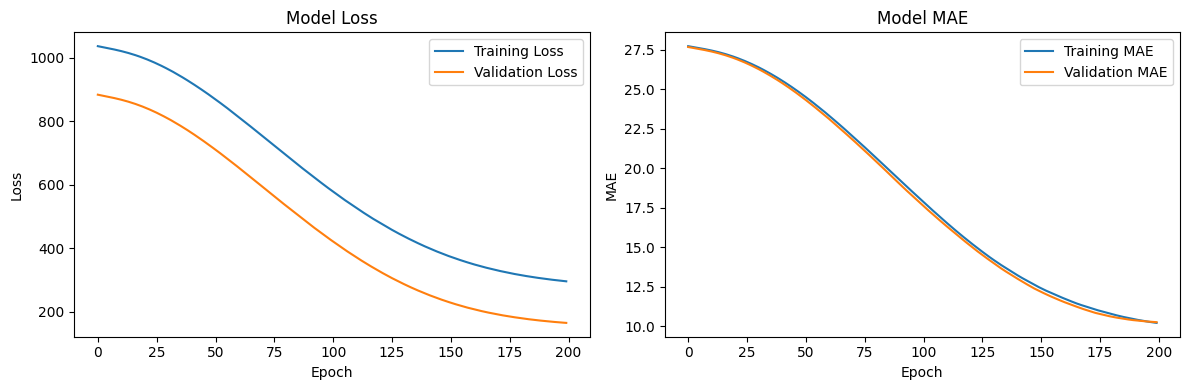

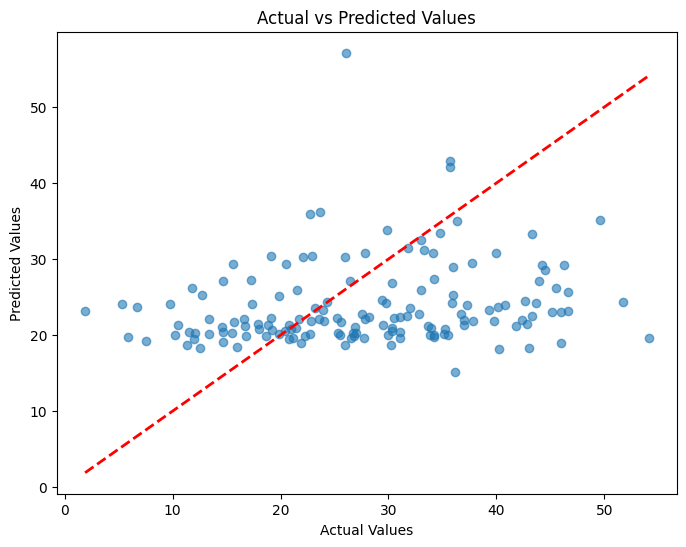

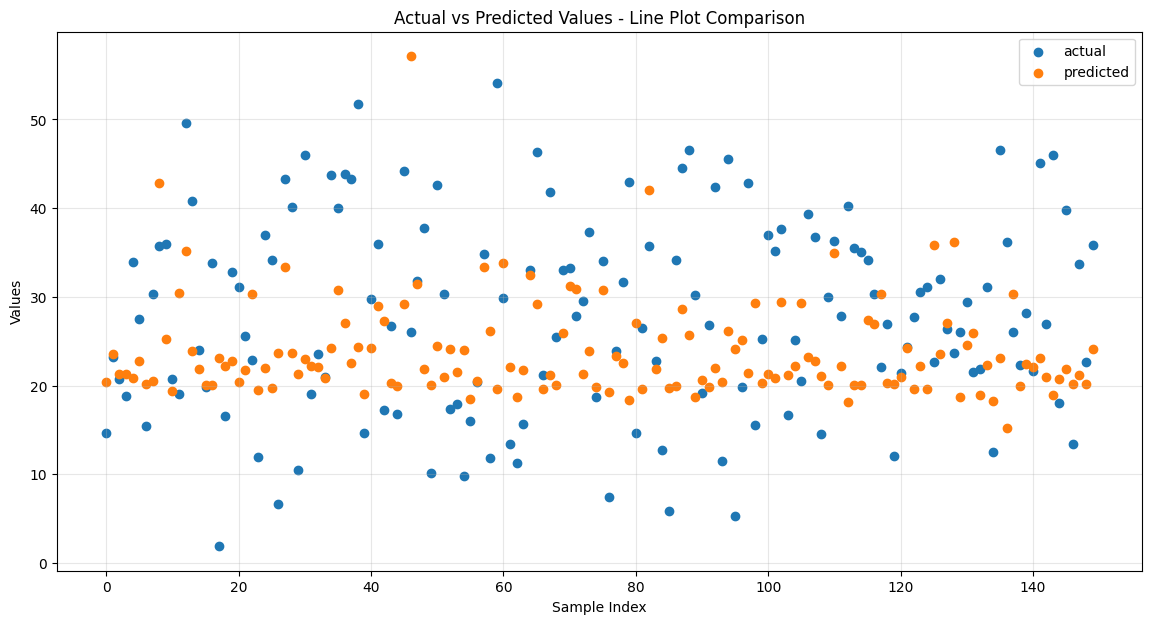

In [ ]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(2, activation='leaky_relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model)

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 411.8763
Test MAE: 17.4237
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Additional Metrics:
MSE: 411.8763
R² Score: -2.3846
MAE: 20.2947


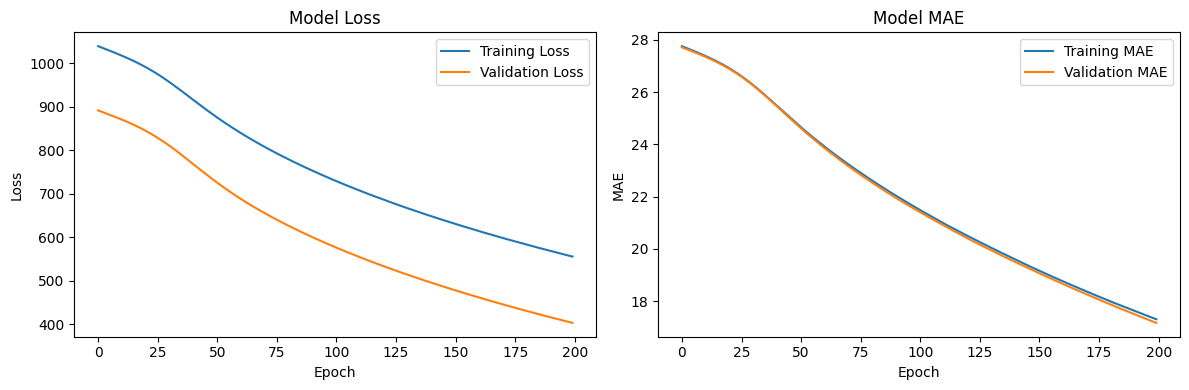

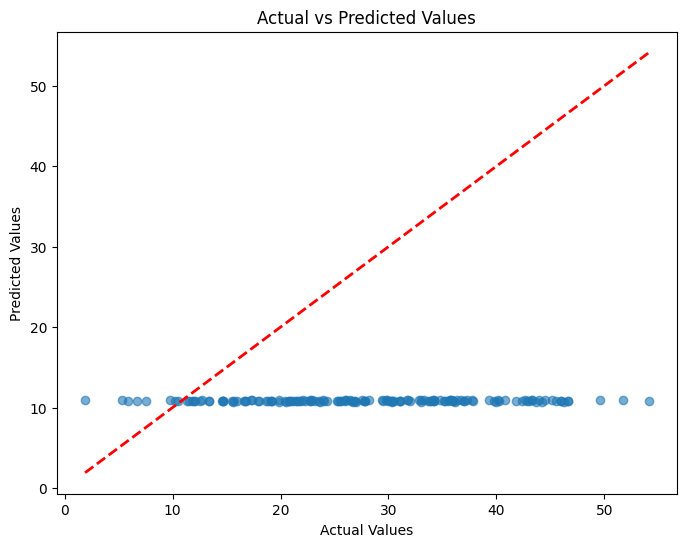

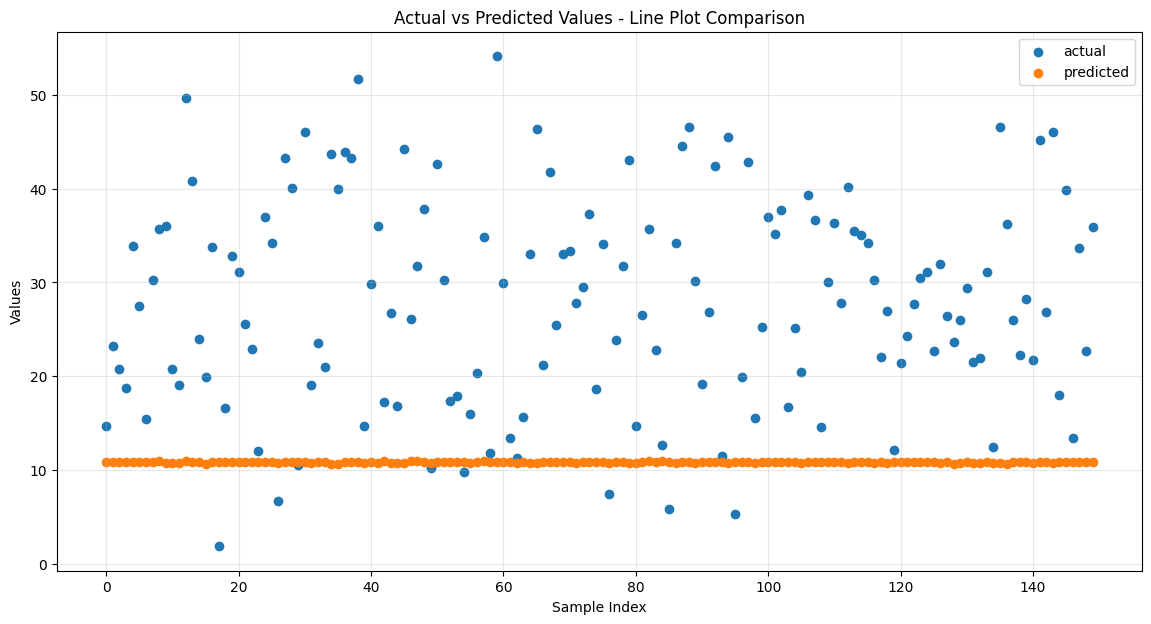

In [13]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(2, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model)

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 144.2951
Test MAE: 9.7437
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Additional Metrics:
MSE: 144.2951
R² Score: -0.1857
MAE: 12.0123


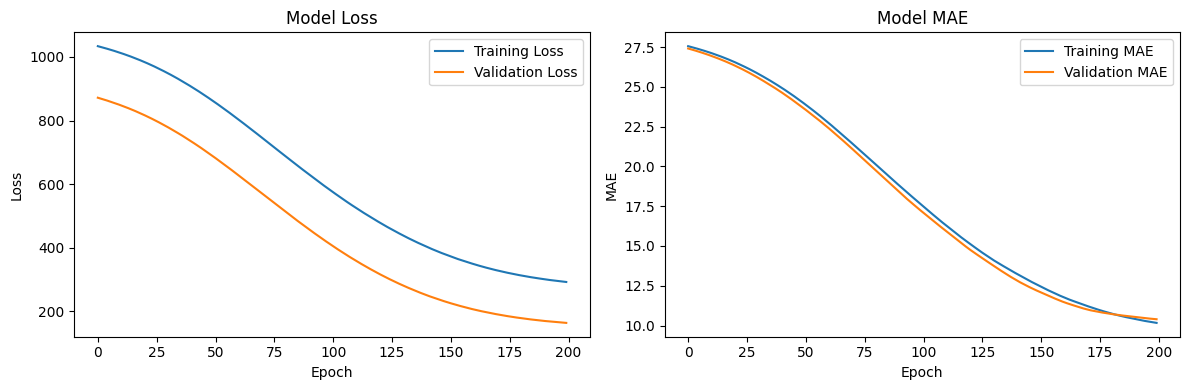

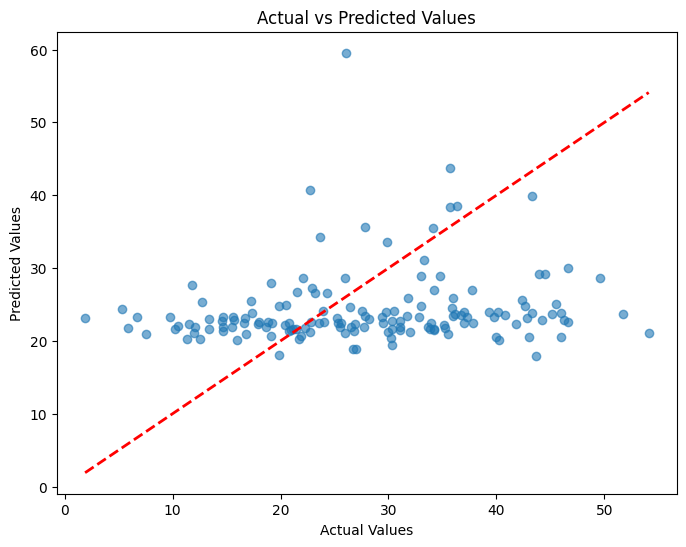

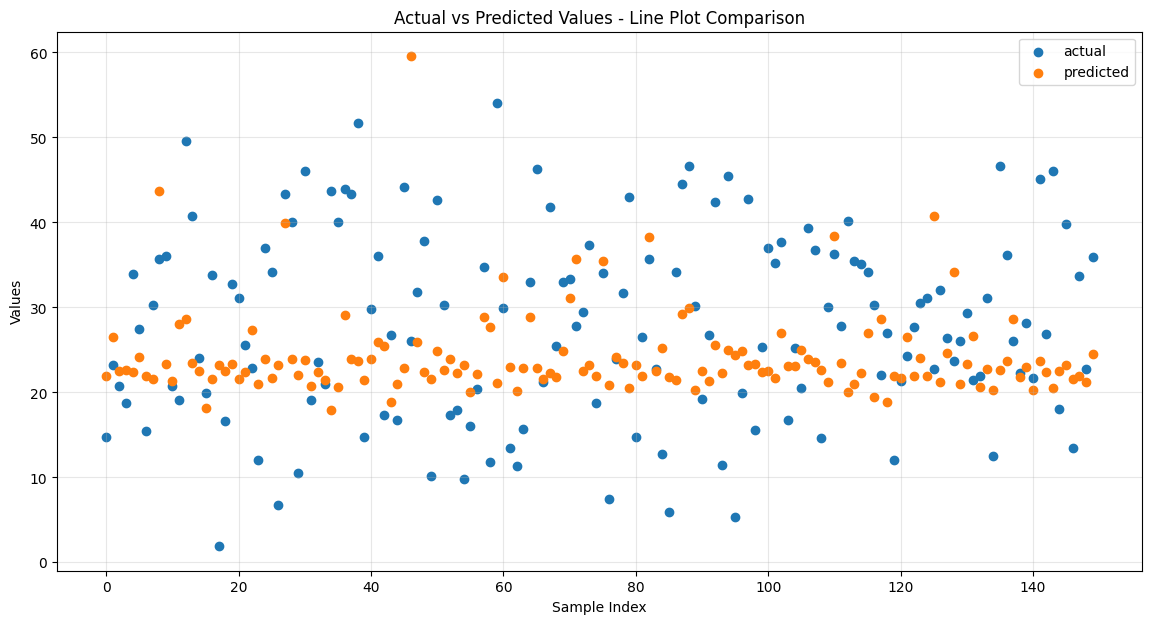

In [14]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(2, activation='elu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model)

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 225.2703
Test MAE: 11.7148
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Additional Metrics:
MSE: 225.2703
R² Score: -0.8511
MAE: 15.0090


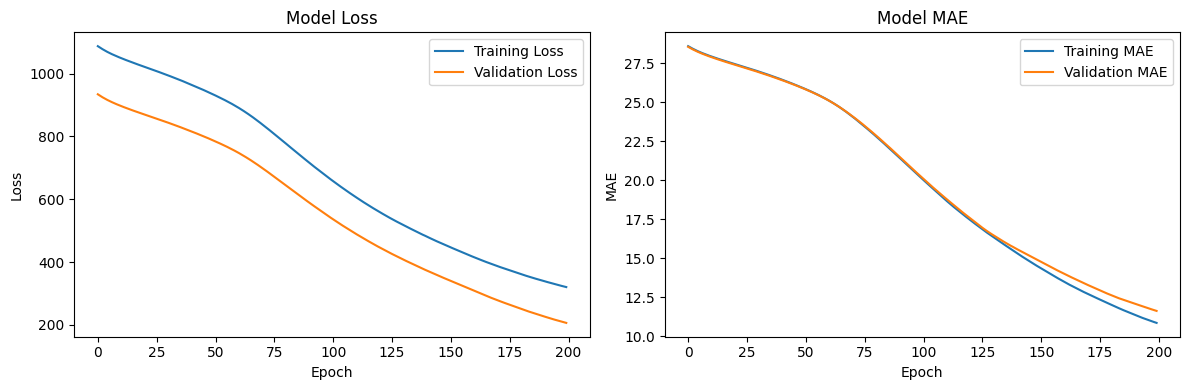

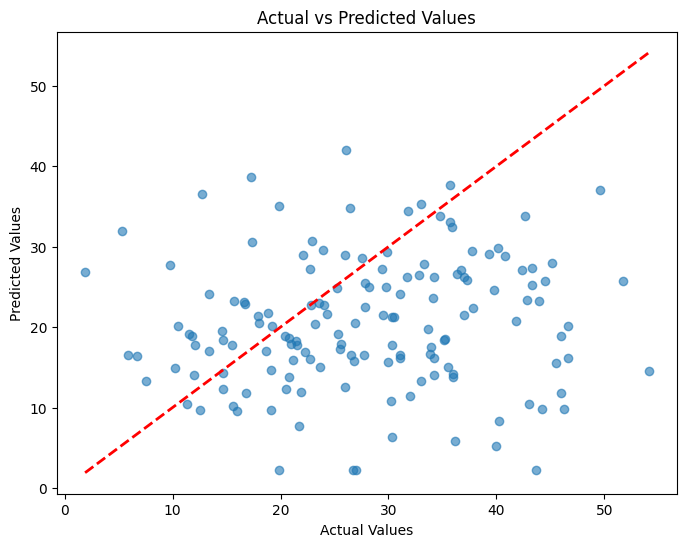

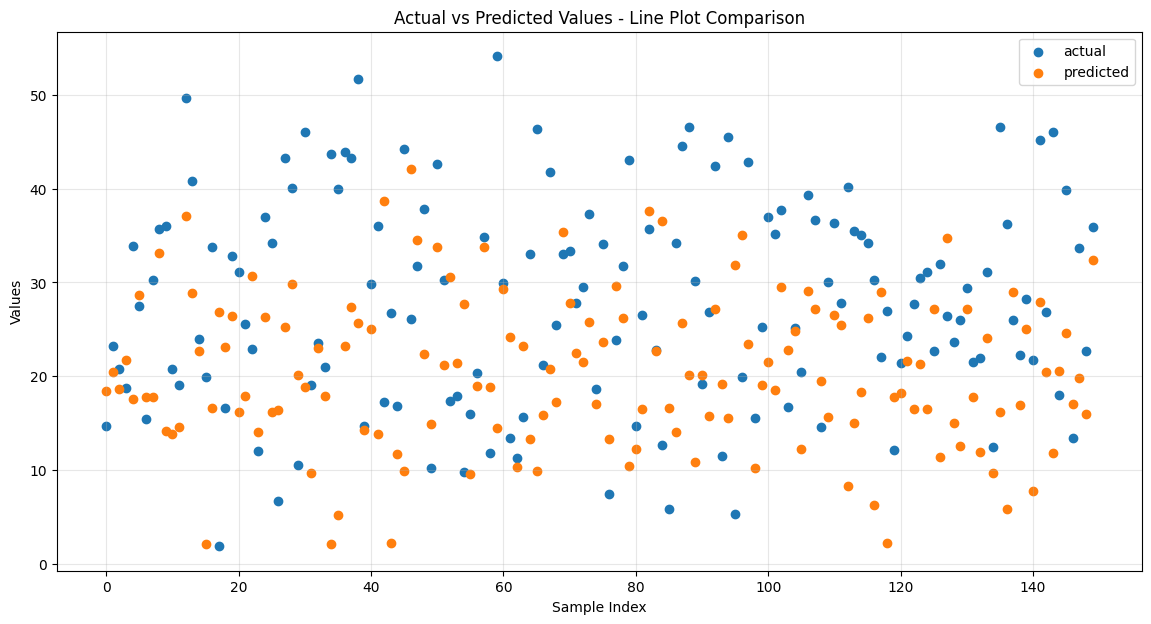

In [17]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model)

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 126.4019
Test MAE: 9.2769
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Additional Metrics:
MSE: 126.4019
R² Score: 0.0920
MAE: 11.2429


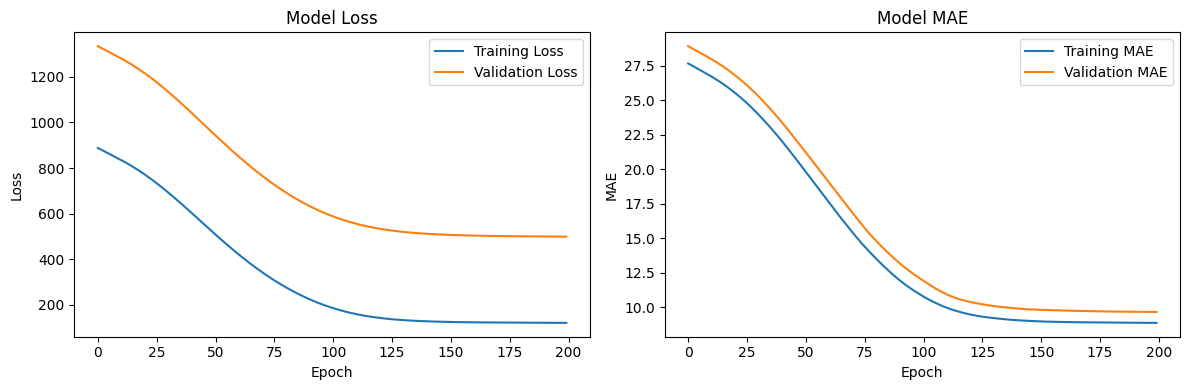

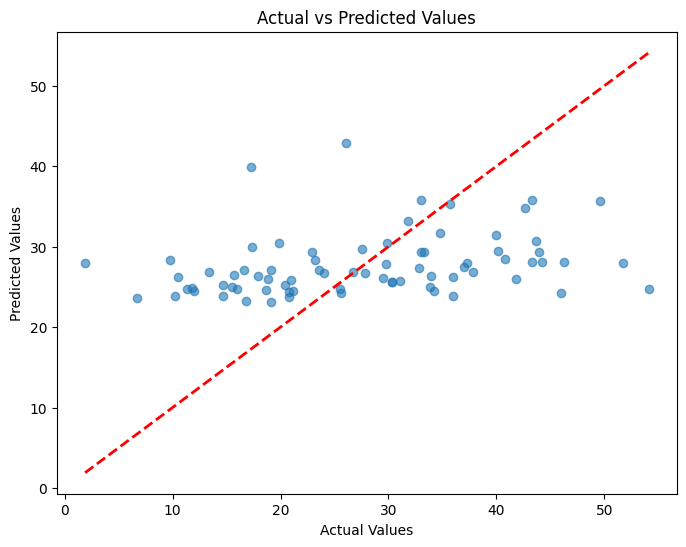

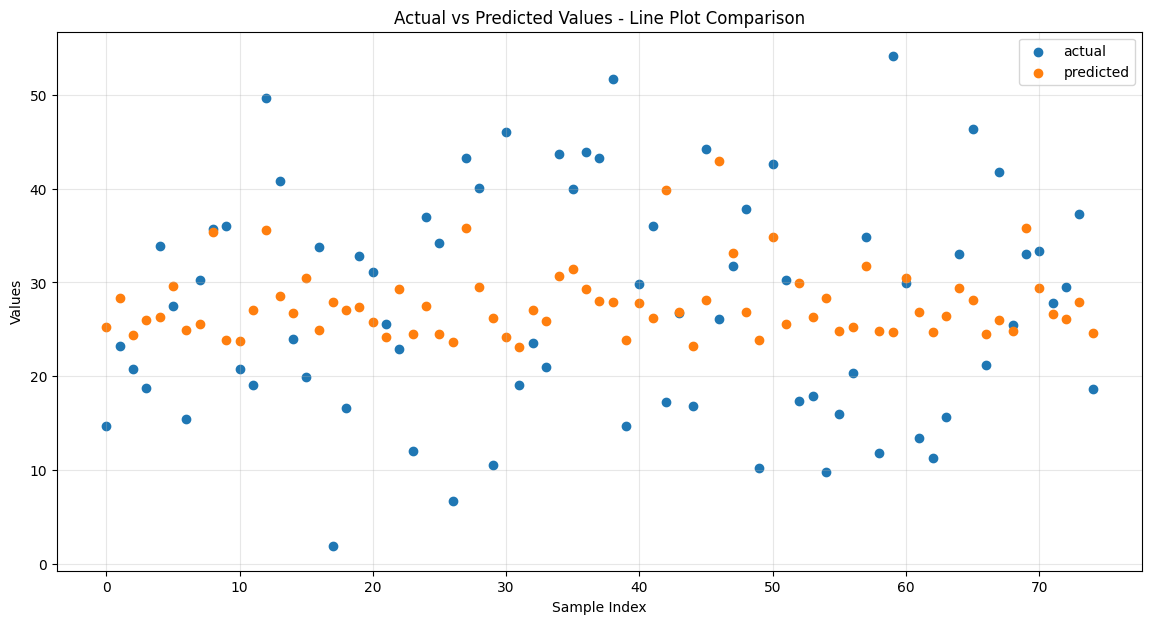

In [19]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model, optimizer='nadam')

/home/kshipra/work/major/ml experiments/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Loss (MSE): 125.8882
Test MAE: 9.2614
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Additional Metrics:
MSE: 125.8882
R² Score: 0.0956
MAE: 11.2200


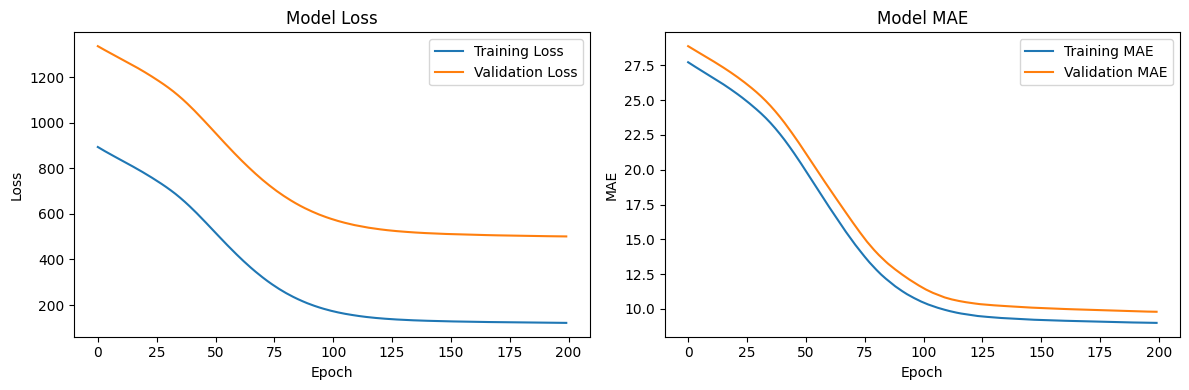

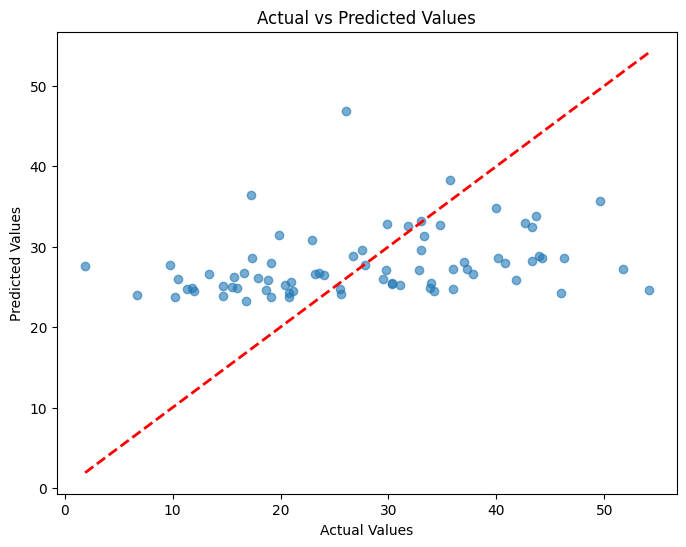

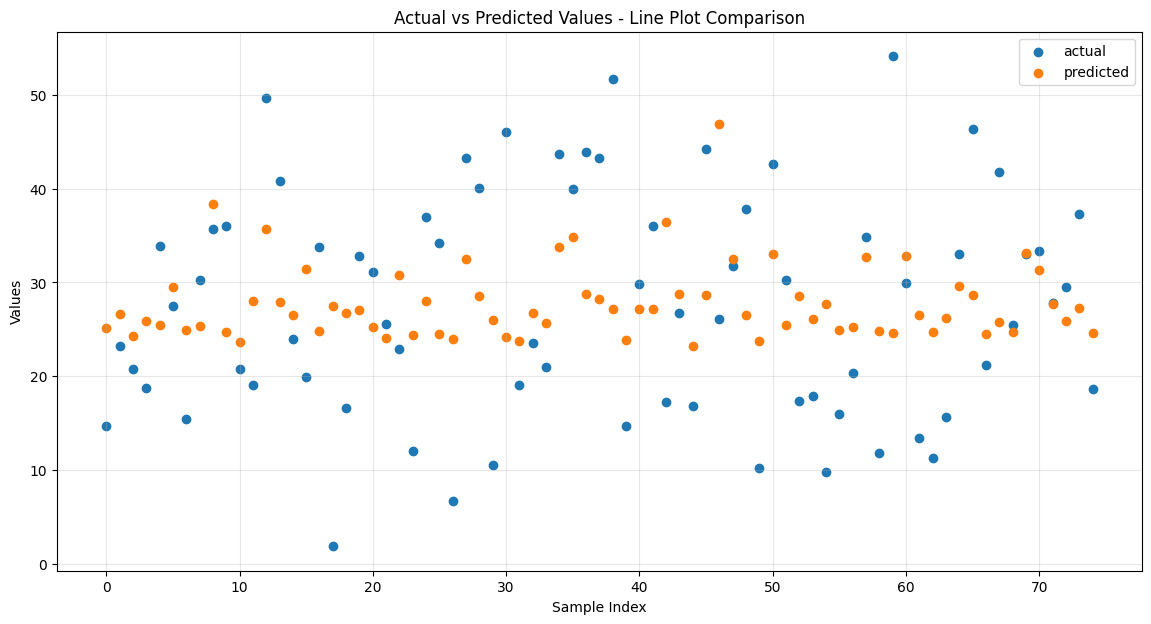

In [22]:
# Build the ANN model with non-linearity
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

train_model(model, optimizer='adamw')